### PCA 

In [11]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [12]:
import plotly.offline as py
import plotly.graph_objs as go

In [13]:
py.init_notebook_mode(connected=True)

In [14]:
df_total = pd.read_excel("../Entrenamientos/result_tramos.xlsx")

In [18]:
df_total = df_total[df_total["sp_vel_aparente"]!=-np.inf]

In [19]:
df_total.describe()

,tramo,tramo_inicial,tramo_final,sp_pwd,tiempo_tramo,distancia_tramo,vel_calc,sp_vel_aparente,porcent_des
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,37.480000,4423.960000,4524.800000,146.697211,230.786667,1404.350534,27.268971,-1.000097,0.024593
std,22.231193,2557.723182,2529.893951,66.803668,497.567768,2419.973943,8.964338,6.867127,2.433537
min,0.000000,0.000000,65.000000,0.000000,2.000000,11.000000,0.770052,-9.859221,-6.677410
25%,18.500000,1297.500000,1654.000000,88.168538,21.500000,112.189268,21.643902,-7.377288,-0.957365
50%,37.000000,5927.000000,5935.000000,157.112154,70.000000,478.200000,27.282754,-2.994640,-0.030749
75%,56.500000,6590.500000,6591.500000,202.654265,142.000000,890.626216,32.798548,5.298305,1.014067
max,75.000000,7478.000000,7564.000000,255.381555,2761.000000,10273.070042,50.116364,18.939865,7.137195


In [7]:
x=np.array(df_total['sp_pwd'])

In [8]:
y=np.array(df_total['vel_calc'])

In [9]:
z=np.array(df_total['porcent_des'])

In [10]:
py.iplot([go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(color=np.array(df_total['sp_vel_aparente']),size=5))])

In [36]:
X_df=df_total[['sp_pwd','vel_calc','porcent_des','sp_vel_aparente']].values

In [37]:
type(X_df)

numpy.ndarray

In [38]:
X_df

array([[  7.78361858e+01,   3.28075472e+01,  -3.37738625e+00,
          8.39654325e+00],
       [  2.55381555e+02,   1.77024490e+01,   4.18109952e+00,
          5.33741523e+00],
       [  1.52194252e+02,   3.87765674e+01,  -1.73787267e+00,
          8.31122048e+00],
       [  2.48770434e+02,   2.43967081e+01,   2.66258489e+00,
          8.70479095e+00],
       [  1.55753257e+02,   3.54378108e+01,  -8.73144297e-01,
          8.48754568e+00],
       [  2.17073745e+02,   2.69178355e+01,   1.56672015e+00,
          8.94523338e+00],
       [  8.16707308e+01,   3.61014085e+01,  -1.73066137e+00,
          8.23097567e+00],
       [  2.19577239e+02,   2.27920530e+01,   2.12610668e+00,
          4.61664437e+00],
       [  8.71470086e+01,   3.26200000e+01,  -1.47185660e+00,
          3.11694636e+00],
       [  2.02978559e+02,   2.71384615e+01,   9.46516922e-01,
         -3.90808636e-01],
       [  5.03086574e+01,   2.96390977e+01,  -2.44000113e+00,
         -1.97751288e+00],
       [  1.68365547e

In [39]:
#vamos con PCA
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [41]:
X_enc=pca.fit_transform(X_df)

In [43]:
py.iplot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_vel_aparente']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [44]:
py.iplot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['porcent_des']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [45]:
py.iplot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['vel_calc']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [46]:
py.iplot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_pwd']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

### MULTIDIMENSIONAL SCALING 

In [47]:
#Vemos distancias entre puntos

In [48]:
from sklearn.metrics.pairwise import pairwise_distances

In [49]:
d = pairwise_distances(X_df)
#d = pairwise_distances(X[:5])

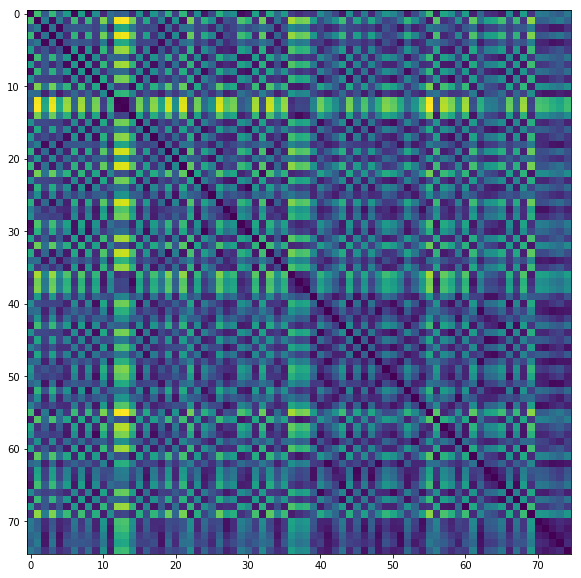

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(d)

In [51]:
#Aplicamos el MDS

In [52]:
#Tarda mucho. No ejecutar

In [53]:
from sklearn.manifold import MDS

In [54]:
X_df2 = df_total[['sp_pwd','vel_calc','porcent_des']].values

In [55]:
mds=MDS(n_components=2)

In [56]:
X_enc=mds.fit_transform(X_df2)

In [58]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_vel_aparente']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [59]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['vel_calc']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [60]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['porcent_des']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [61]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_pwd']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [62]:
#ISOMAP

In [63]:
from sklearn.manifold import isomap

In [64]:
iso = isomap.Isomap(n_components=2)

In [65]:
X_enc=iso.fit_transform(X_df2)

In [67]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_vel_aparente']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [68]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_pwd']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [69]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['vel_calc']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [70]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['porcent_des']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

### T-SNE

In [56]:
#PUNTOS LEJANOS CUANDO SON ACERCADOS NO PENALIZA
#PUNTOS CERCANOS SI LOS ALEJA PENALIZA MUCHO
#SE BASA EN PROBABILIDADES DE QUE UN PUNTO ESTE CERCA DE OTRO PUNTO

In [16]:
X_df2

array([[   0.        ,    5.        ,    0.        ],
       [   0.        ,    5.14174814,  -11.73132446],
       [   0.        ,    5.19999981,    1.39853274],
       ..., 
       [ 153.8       ,    7.46000004,   -2.65256559],
       [ 163.59985034,    7.30000019,    2.54632635],
       [ 137.        ,    7.30000019,    0.        ]])

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2)

In [19]:
X_enc=tsne.fit_transform(X_df2)

In [71]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_vel_aparente']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [72]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['sp_pwd']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [73]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['vel_calc']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [74]:
py.plot(([go.Scatter(x=X_enc[:,0],y=X_enc[:,1],mode='markers',marker=dict(color=np.array(df_total['porcent_des']),size=5))]))

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [77]:
#vamos con TSNE
from sklearn.manifold import TSNE

In [78]:
tsne3d = TSNE(n_components=3)

In [79]:
X_enc_3d=tsne3d.fit_transform(X_df2)

In [80]:
py.plot([go.Scatter3d(x=X_enc_3d[:,0],y=X_enc_3d[:,1],z=X_enc_3d[:,2],mode='markers',marker=dict(color=np.array(df_total['sp_pwd']),size=5))])

'file://D:\\Documents\\AnacondaProjects\\Project_TFM\\IM_KS\\Machine Learning\\temp-plot.html'

In [81]:
X_enc_3d

array([[ 174.85075378,  -12.43148041, -157.32437134],
       [ -84.73188782, -145.77854919, -139.44334412],
       [ 183.84925842,   83.75721741, -103.12800598],
       [-211.40951538, -353.68121338,  189.28068542],
       [-147.51795959,   37.7253418 , -130.33436584],
       [ -34.54995728,  192.55747986,  -75.30099487],
       [  65.51920319,  145.88056946, -154.58236694],
       [ 157.42172241,  199.38101196, -111.31178284],
       [-119.09355164, -173.0533905 ,  -29.21006775],
       [ -26.10897636,  -42.3052597 ,  271.29898071],
       [-126.77222443, -119.81118774,   64.71005249],
       [ -51.12429428,   26.35881042, -163.57080078],
       [  25.86698723, -150.76210022, -224.81529236],
       [-202.21768188,   96.62503052,  100.51941681],
       [ 203.6459198 ,  -33.24499512,   97.25278473],
       [ -25.01448631, -188.3377533 ,  112.38352203],
       [ -18.25240326, -234.80123901,  -41.49599457],
       [  50.35377502, -218.30329895, -131.86032104],
       [ -46.08896637,  -70.

In [82]:
df_total['x_tsne']=0

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [83]:
kk = X_enc_3d[:,0]

In [84]:
len(X_df)

75

In [85]:
len(X_enc_3d[:,0])

75

In [42]:
kk2 = kk.tolist()
type(kk2)

list

In [45]:
X_df

array([[   0.        ,    5.        ,    0.        ,    0.        ],
       [   0.        ,    5.14174814,  -11.73132446,    9.36322184],
       [   0.        ,    5.19999981,    1.39853274,    9.81721966],
       ..., 
       [ 153.8       ,    7.46000004,   -2.65256559,   -9.87517531],
       [ 163.59985034,    7.30000019,    2.54632635,   -9.92730837],
       [ 137.        ,    7.30000019,    0.        ,   -9.96827011]])

In [87]:
X_df_clust=df_total[['sp_pwd','vel_calc','porcent_des','sp_vel_aparente']]

In [88]:
X_df_clust['x_tsne']=X_enc_3d[:,0]
X_df_clust['y_tsne']=X_enc_3d[:,1]
X_df_clust['z_tsne']=X_enc_3d[:,2]

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [89]:
X_df_clust.to_csv('tramos_ml_pca.csv')

In [90]:
X_df_clust

,sp_pwd,vel_calc,porcent_des,sp_vel_aparente,x_tsne,y_tsne,z_tsne
0,77.836186,32.807547,-3.377386,8.396543,174.850754,-12.431480,-157.324371
1,255.381555,17.702449,4.181100,5.337415,-84.731888,-145.778549,-139.443344
2,152.194252,38.776567,-1.737873,8.311220,183.849258,83.757217,-103.128006
3,248.770434,24.396708,2.662585,8.704791,-211.409515,-353.681213,189.280685
4,155.753257,35.437811,-0.873144,8.487546,-147.517960,37.725342,-130.334366
5,217.073745,26.917836,1.566720,8.945233,-34.549957,192.557480,-75.300995
6,81.670731,36.101408,-1.730661,8.230976,65.519203,145.880569,-154.582367
7,219.577239,22.792053,2.126107,4.616644,157.421722,199.381012,-111.311783
8,87.147009,32.620000,-1.471857,3.116946,-119.093552,-173.053391,-29.210068
9,202.978559,27.138462,0.946517,-0.390809,-26.108976,-42.305260,271.298981
